<a href="https://colab.research.google.com/github/emiliagyr/EstadisticaExperimental/blob/main/P2_PCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pingouin
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 14.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import pingouin as pg

Opcional: si el contenido de las columnas no se muestra completo

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
# dv = variable dependiente
# group = niveles de la variable independiente

#1. Leer los datos del documento .sav (SPSS) o .csv (Excel)

In [ ]:
df = pd.read_spss("PCI.sav")
df

,SEXO,COND,PCI
0,Femenino,Semejanza Intergrupal,2.000000
1,Femenino,Semejanza Intergrupal,2.000000
2,Femenino,Semejanza Intergrupal,2.041667
3,Femenino,Semejanza Intergrupal,2.083333
4,Femenino,Semejanza Intergrupal,2.458333
5,Femenino,Semejanza Intergrupal,2.541667
6,Femenino,Semejanza Intergrupal,2.750000
7,Femenino,Semejanza Intergrupal,2.791667
8,Femenino,Diferencia Intergrupal,1.541667
9,Femenino,Diferencia Intergrupal,1.958333


#2. Estadisticos descriptivos

In [ ]:
df.describe()

,PCI
count,30.000000
mean,2.329167
std,0.388309
min,1.541667
25%,2.010417
50%,2.250000
75%,2.625000
max,3.250000


#Variable dependiente: Sexo

##3. Normalidad

In [ ]:
# Constraste de normalidad
pg.normality(data=df, dv="PCI", group="SEXO", method="shapiro")

,W,pval,normal
SEXO,,,
Femenino,0.922271,0.208603,True
Masculino,0.962166,0.729983,True


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

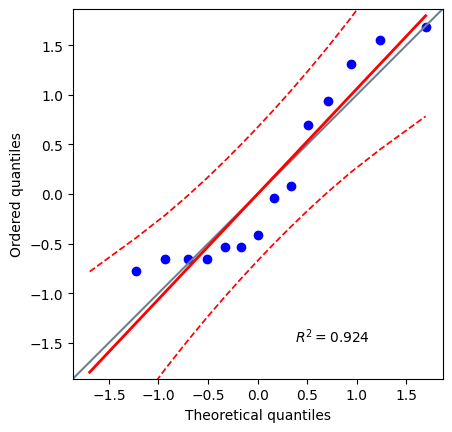

In [ ]:
# Gráficos: QQPlot de cada nivel de la VI
pg.qqplot(df.query("SEXO == 'Femenino'")["PCI"])

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

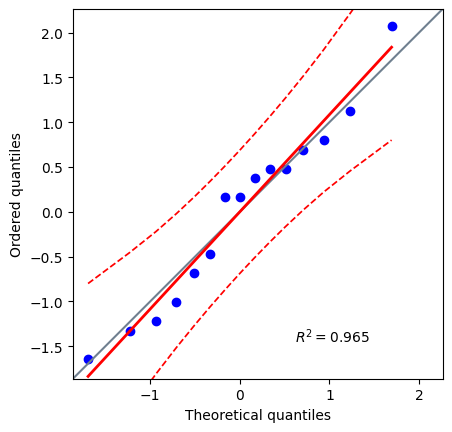

In [ ]:
# Gráficos: QQPlot de cada nivel de la VI
pg.qqplot(df.query("SEXO == 'Masculino'")["PCI"])

##4. Contraste de medias

In [ ]:
# Homogeneidad de varianzas: Sólo para contrastes paramétricos de muestras independientes
pg.homoscedasticity(data=df, dv="PCI", group="SEXO")

,W,pval,equal_var
levene,0.269446,0.607783,True


In [ ]:
pg.pairwise_tests(
    data=df,
    dv="PCI",
    between="SEXO",
    effsize="cohen",
    correction=False,
    alternative="less",
)
# correction responde a la necesidad de hacer una corrección por varianzas no homogéneas. Por lo tanto, False implica varianzas homogéneas.
# "within" = intrasujeto / "between" = intersujeto
# Alternative "greater"  A > B / Alternative "less" A < B

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,SEXO,Femenino,Masculino,False,True,-1.544064,28.0,less,0.066901,1.672,-0.563812
